In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
plt.rc('font', size=16)

In [33]:
x = np.random.normal(loc=0, scale=1, size=10000)

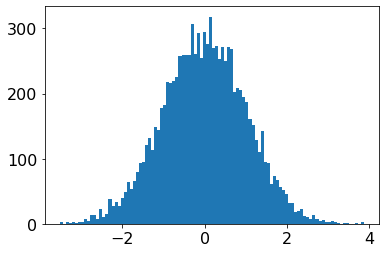

In [34]:
plt.hist(x, bins=100)
plt.show()

In [35]:
y = np.random.normal(scale=2.0, size=10000)
z = np.random.normal(scale=3.0, size=10000)

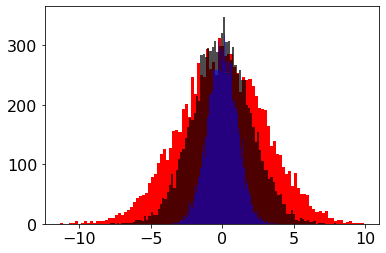

In [36]:
plt.hist(z, bins=100, color='r')
plt.hist(y, bins=100, color='k', alpha=0.7)
plt.hist(x, bins=100, color='b', alpha=0.5)
plt.show()

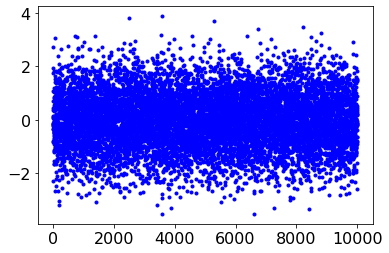

In [37]:
plt.plot(x, 'b.')

In [38]:
## PV = n R T
n = 10 # mol
R = 8.31 # J /K /mol

T = np.random.normal(loc=25, scale=2.0, size=500) + 273 # K
V = np.random.normal(loc=100, scale= 1.0, size=500)

In [39]:
P = n * R * T / V # atm

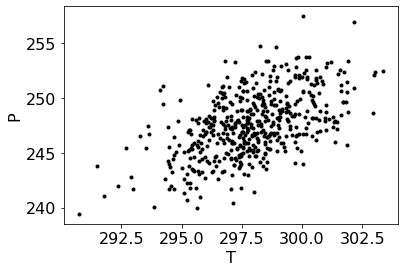

In [40]:
plt.plot(T, P, 'k.')
plt.xlabel("T")
plt.ylabel("P")
plt.show()

In [41]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

In [63]:
xn = np.linspace(-3.14, 3.14, num=20).reshape(-1, 1)
yn = np.sin(xn) + 0.1 * np.random.randn(20, 1).reshape(-1, 1)

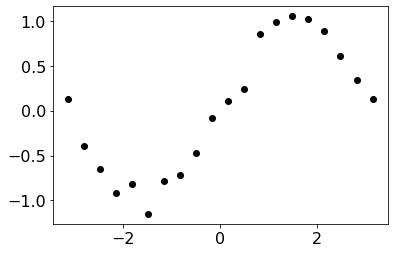

In [64]:
plt.plot(xn, yn, 'ko')
plt.show()

In [97]:
K = 1.0 * RBF(length_scale=0.5) + WhiteKernel(noise_level=0.1)
gpr = GaussianProcessRegressor(kernel=K)
gpr.fit(xn, yn)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.5) + WhiteKernel(noise_level=0.1))

In [114]:
X = np.linspace(-10, 10, num=500).reshape(-1, 1)
pred, sd = gpr.predict(X, return_std=True)
sd = sd.reshape(-1, 1)

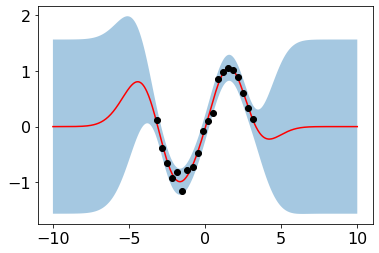

In [115]:
plt.plot(X, pred, 'r-')
plt.plot(xn, yn, 'ko')
plt.fill(np.concatenate([X, X[::-1]]),
       np.concatenate([pred + 1.96 * sd, (pred - 1.96 * sd)[::-1]]), alpha=0.4)
plt.show()

In [116]:
# load
import pandas as pd

In [118]:
dc = pd.read_csv("../data/c_0_train.csv", index_col=0)
dd = pd.read_csv("../data/d_0_train.csv", index_col=0)
dfeat = pd.read_csv("../data/RFE_clf_indices.txt", names=["colid"])

In [132]:
y2 = dc[dc.columns[-2]]
y1 = dc[dc.columns[-1]]

In [133]:
Xc = dc[dc.columns[:-2]]
Xd = dd[dd.columns[:-2]]

In [134]:
Xtot = pd.concat([Xc, Xd], axis=1)

In [135]:
ye = y2[y2 < 400]
yf = y1[y2 < 400]
Xtot = Xtot[y2 < 400]

In [137]:
from sklearn import preprocessing

In [141]:
scaler = preprocessing.StandardScaler().fit(Xtot) 
xscaled = scaler.transform(Xtot)

In [142]:
from sklearn.model_selection import train_test_split

In [144]:
xtr, xtest, ytr, ytest = train_test_split(xscaled, yf, test_size=200)

In [145]:
gpr.fit(xtr, ytr)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=0.5) + WhiteKernel(noise_level=0.1))

In [147]:
ypred, sd = gpr.predict(xtest, return_std=True)

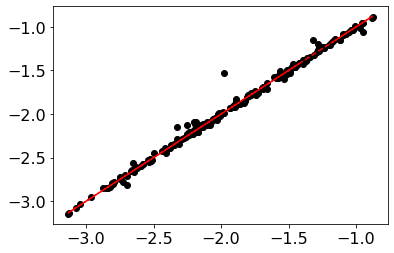

In [153]:
plt.plot(ytest, ypred, 'ko')
plt.plot(ytest, ytest, 'r--')
plt.show()

In [157]:
from sklearn.metrics import r2_score

In [158]:
r2_score(ypred, ytest)

0.9929698233652511